# House Prices Peediction Using Tensorflow Decision Forests

install libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_predict  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer


train_test_split : 학습 세트와 테스트 세트로 분할하는데 사용.  
cross_val_predict : 모델을 교차 검증 하는데 사용. 교차 검증은 모델의 성능을 평가하는 데 가장 일반적으로 사용되는 방법.  
StandardScaler : 특성의 스케일을 조정하는데 사용. 특성이 스케일 되지 않으면 모델이 feature의 특성에 따라 편향될 수 있음.  
r2_score, mean_absolute_error, mean_squared_error : r2_score는 모델이 데이터를 설명하는 데 얼마나 잘 수행하는지 측정합니다. mean_absolute_error는 모델의 예측과 실제 값의 차이의 평균을 측정합니다. mean_squared_error는 모델의 예측과 실제 값의 차이의 제곱의 평균을 측정합니다. 

* LinearRegression은 선형 회귀 모델을 생성하고 학습하는 데 사용됩니다. 선형 회귀 모델은 선형 관계를 가진 데이터를 예측하는 데 사용됩니다  
* Ridge는 규제된 선형 회귀 모델을 생성하고 학습하는 데 사용됩니다. 규제된 선형 회귀 모델은 특성의 중요도를 조정하여 모델의 편향을 줄입니다.  
* Lasso는 규제된 선형 회귀 모델을 생성하고 학습하는 데 사용됩니다. Lasso 모델은 특성의 중요도를 조정하여 모델의 특성 수를 줄입니다.  
* lightgbm은 LightGBM 분류기와 회귀 모델을 생성하고 학습하는 데 사용됩니다. LightGBM은 매우 빠른 속도로 매우 정확한 모델을 생성할 수 있습니다.  
* RandomForestRegressor은 랜덤 포레스트 회귀 모델을 생성하고 학습하는 데 사용됩니다. 랜덤 포레스트 모델은 여러 개의 의사 결정 트리를 결합하여 예측을 생성합니다.  
* SVR은 서포트 벡터 회귀 모델을 생성하고 학습하는 데 사용됩니다. 서포트 벡터 모델은 특성의 특정 부분을 사용하여 예측을 생성합니다.  
* GradientBoostingRegressor은 그레이디언트 부스팅 회귀 모델을 생성하고 학습하는 데 사용됩니다. 그레이디언트 부스팅 모델은 여러 개의 회귀 모델을 결합하여 예측을 생성합니다.  
* XGBRegressor은 XGBoost 회귀 모델을 생성하고 학습하는 데 사용됩니다. XGBoost는 매우 빠른 속도로 매우 정확한 모델을 생성할 수 있습니다.  
* PolynomialFeatures는 특성을 다항식으로 변환하는 데 사용됩니다. 다항식 특성은 선형 회귀 모델의 성능을 향상시킬 수 있습니다.  
* SimpleImputer은 누락된 데이터를 특성의 평균값으로 채우는 데 사용됩니다. 누락된 데이터를 채우는 것은 모델의 성능을 향상시킬 수 있습니다.  

Loading Data

In [7]:
df = pd.read_csv("train.csv")

# Exploratry Data Analysis

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.shape

(1460, 81)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Getting the statistical summary of dataset

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Visualizing the correlations between numerical variables


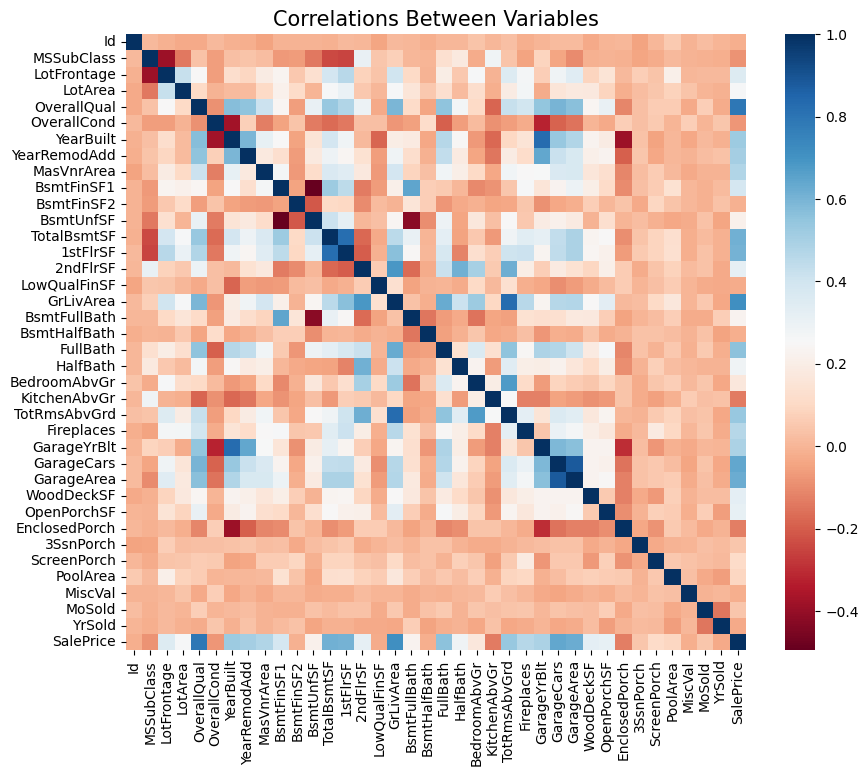

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

### Feature Selsction
In addition to selecting numerical features with correlation rates above 0.50 or below -0.50 based on the Pearson Correlation Method, we also considered categorical feature that we believe have a significant effect on the target variable, such as Heating and MSZoning.

In [15]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities", "BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

Checking for the missing values